In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import frangi, hessian

In [14]:
# Load the image
image = plt.imread('D:/IACTA/task1/test/Org/axial0060.png')

# Apply the Hessian filter to detect vessel-like structures
hessian_img = hessian(image)

# Apply the Frangi filter to enhance the vessels
frangi_img = frangi(hessian_img)

In [23]:
# Apply a threshold to the Frangi image to create a binary mask
mask = frangi_img > 0.5
print(len(mask))
# Smooth the mask using a morphological closing operation
from skimage.morphology import closing, disk
mask = closing(mask)

# Apply the mask to the original image to extract the vessel
vessel = np.multiply(image, mask)

462


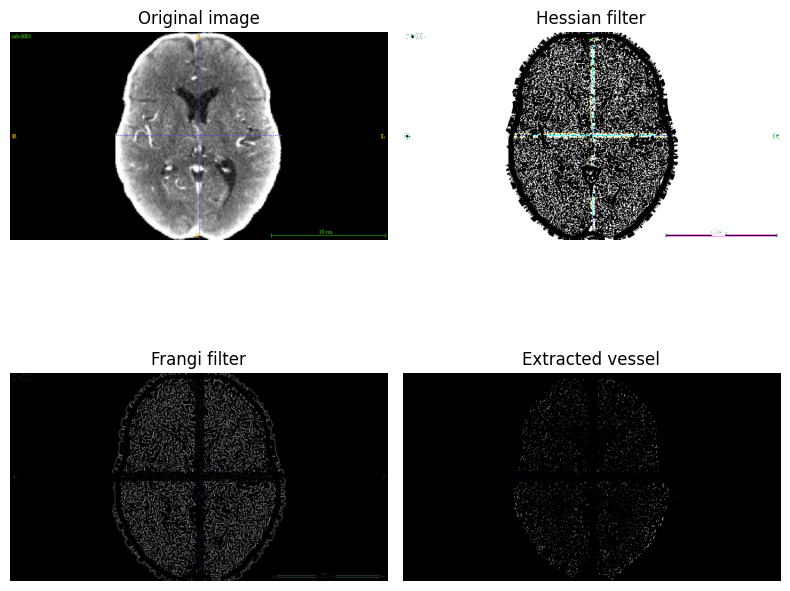

In [24]:
# Display the results
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(hessian_img, cmap=plt.cm.gray)
ax[1].set_title('Hessian filter')
ax[2].imshow(frangi_img, cmap=plt.cm.gray)
ax[2].set_title('Frangi filter')
ax[3].imshow(vessel, cmap=plt.cm.gray)
ax[3].set_title('Extracted vessel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()